In [1]:
# Set up dask client

import warnings
warnings.filterwarnings("ignore")

from dask.distributed import Client, progress

client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:61976 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


In [2]:
import dask.dataframe as dd
import dask.array as da
import numpy as np
import pandas as pd
lendingclub_df = dd.read_csv('lendingclub.csv', dtype = {'all_util': 'float64',
       'annual_inc': 'float64',
       'avg_cur_bal': 'float64',
       'debt_settlement_flag_date': 'object',
       'hardship_end_date': 'object',
       'hardship_loan_status': 'object',
       'hardship_reason': 'object',
       'hardship_start_date': 'object',
       'hardship_status': 'object',
       'hardship_type': 'object',
       'payment_plan_start_date': 'object',
       'settlement_date': 'object',
       'settlement_status': 'object', 'desc': 'object', 'funded_amnt_inv': 'float64'}, assume_missing = True)

In [3]:
# List of selected continous variables

cont_vars_selected = ['int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit']

In [4]:
# Make a dataframe of continous variables using the list of selected continous variables

cont_vars_df = lendingclub_df[cont_vars_selected]

In [5]:
# Continous variables dataframe

cont_vars_df.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,13.56,55000.0,18.24,0.0,1.0,NaN,9.0,1.0,4341.0,10.3,...,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0
1,18.94,90000.0,26.52,0.0,0.0,71.0,13.0,1.0,12315.0,24.2,...,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0
2,17.97,59280.0,10.51,0.0,0.0,NaN,8.0,0.0,4599.0,19.1,...,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0
3,18.94,92000.0,16.74,0.0,0.0,NaN,10.0,0.0,5468.0,78.1,...,0.0,3.0,100.0,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0
4,16.14,57250.0,26.35,0.0,0.0,NaN,12.0,0.0,829.0,3.6,...,0.0,5.0,92.3,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0


In [6]:
# List of selected categorical variables

selected_cat_vars = ['debt_settlement_flag', 'grade', 'loan_status', 'home_ownership', 'issue_d', 'emp_length', 'earliest_cr_line', 'term']

In [7]:
# Make a dataframe of selected categorical variables

cat_vars_df = lendingclub_df[selected_cat_vars]

In [8]:
# categorical variables dataframe

cat_vars_df.head()

,debt_settlement_flag,grade,loan_status,home_ownership,issue_d,emp_length,earliest_cr_line,term
0,N,C,Current,RENT,Dec-2018,10+ years,Apr-2001,36 months
1,N,D,Current,MORTGAGE,Dec-2018,10+ years,Jun-1987,60 months
2,N,D,Current,MORTGAGE,Dec-2018,6 years,Apr-2011,36 months
3,N,D,Current,MORTGAGE,Dec-2018,10+ years,Feb-2006,36 months
4,N,C,Current,MORTGAGE,Dec-2018,10+ years,Dec-2000,60 months


In [9]:
# Concatenate continous variables dataframe and categorical variables dataframe. the resulting dataframe is contains all
# the variables that will be processed and used in building the credit risk model.

model_data = dd.concat([cont_vars_df, cat_vars_df], axis = 1)

In [10]:
# Quick view model data

model_data.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,...,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,grade,loan_status,home_ownership,issue_d,emp_length,earliest_cr_line,term
0,13.56,55000.0,18.24,0.0,1.0,NaN,9.0,1.0,4341.0,10.3,...,36500.0,18124.0,N,C,Current,RENT,Dec-2018,10+ years,Apr-2001,36 months
1,18.94,90000.0,26.52,0.0,0.0,71.0,13.0,1.0,12315.0,24.2,...,15000.0,94072.0,N,D,Current,MORTGAGE,Dec-2018,10+ years,Jun-1987,60 months
2,17.97,59280.0,10.51,0.0,0.0,NaN,8.0,0.0,4599.0,19.1,...,13800.0,10000.0,N,D,Current,MORTGAGE,Dec-2018,6 years,Apr-2011,36 months
3,18.94,92000.0,16.74,0.0,0.0,NaN,10.0,0.0,5468.0,78.1,...,5000.0,44984.0,N,D,Current,MORTGAGE,Dec-2018,10+ years,Feb-2006,36 months
4,16.14,57250.0,26.35,0.0,0.0,NaN,12.0,0.0,829.0,3.6,...,9300.0,32332.0,N,C,Current,MORTGAGE,Dec-2018,10+ years,Dec-2000,60 months


In [11]:
# Strip unwanted string characers from emp_length column

model_data['emp_length_int'] = model_data['emp_length'].str.replace(' years', '')
model_data['emp_length_int'] = model_data['emp_length_int'].str.replace('< 1 year', str(0))
model_data['emp_length_int'] = model_data['emp_length_int'].str.replace('1 year', str(1))
model_data['emp_length_int'] = model_data['emp_length_int'].str.replace('10\+', '10')

In [12]:
# convert emp_length_int(categorical) to numerical data

model_data['emp_length_int'] = dd.to_numeric(model_data['emp_length_int'])

In [13]:
# Strip unwanted string characters from the 'term' variable

model_data['term_int'] = model_data['term'].str.replace(' ', '')
model_data['term_int'] = model_data['term_int'].str.replace('months', '')

In [14]:
# convert the categorical variable 'term_int' to a numerical one

model_data['term_int'] = dd.to_numeric(model_data['term_int'])

In [15]:
model_data = model_data.persist()

In [16]:
model_data['good_bad'] = model_data['loan_status'].apply(lambda x: 1 if x == 'Current' or
                                                         x == 'Fully Paid' or
                                                         x == 'Does not meet the credit policy. Status:Fully Paid' 
                                                         else 0, meta = ('good_bad', 'int64'))

In [17]:
model_data.head(10)

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,...,grade,loan_status,home_ownership,issue_d,emp_length,earliest_cr_line,term,emp_length_int,term_int,good_bad
0,13.56,55000.0,18.24,0.0,1.0,NaN,9.0,1.0,4341.0,10.3,...,C,Current,RENT,Dec-2018,10+ years,Apr-2001,36 months,10.0,36,1
1,18.94,90000.0,26.52,0.0,0.0,71.0,13.0,1.0,12315.0,24.2,...,D,Current,MORTGAGE,Dec-2018,10+ years,Jun-1987,60 months,10.0,60,1
2,17.97,59280.0,10.51,0.0,0.0,NaN,8.0,0.0,4599.0,19.1,...,D,Current,MORTGAGE,Dec-2018,6 years,Apr-2011,36 months,6.0,36,1
3,18.94,92000.0,16.74,0.0,0.0,NaN,10.0,0.0,5468.0,78.1,...,D,Current,MORTGAGE,Dec-2018,10+ years,Feb-2006,36 months,10.0,36,1
4,16.14,57250.0,26.35,0.0,0.0,NaN,12.0,0.0,829.0,3.6,...,C,Current,MORTGAGE,Dec-2018,10+ years,Dec-2000,60 months,10.0,60,1
5,15.02,152500.0,37.94,0.0,3.0,NaN,18.0,0.0,53854.0,48.1,...,C,Current,MORTGAGE,Dec-2018,10+ years,Sep-2002,36 months,10.0,36,1
6,17.97,51000.0,2.40,0.0,1.0,NaN,1.0,0.0,0.0,NaN,...,D,Current,RENT,Dec-2018,4 years,Nov-2004,36 months,4.0,36,1
7,13.56,65000.0,30.10,0.0,0.0,NaN,19.0,0.0,38476.0,69.3,...,C,Current,RENT,Dec-2018,10+ years,Nov-1997,36 months,10.0,36,1
8,17.97,53580.0,21.16,0.0,1.0,32.0,8.0,0.0,8018.0,35.2,...,D,Current,MORTGAGE,Dec-2018,10+ years,Aug-1998,36 months,10.0,36,1
9,14.47,300000.0,17.43,1.0,1.0,17.0,38.0,0.0,65950.0,49.8,...,C,Current,OWN,Dec-2018,< 1 year,Apr-2002,36 months,0.0,36,1


In [18]:
# Drop some unwanted and irrelevant columns

model_data = model_data.drop(['emp_length', 'issue_d', 'earliest_cr_line', 'term', 'loan_status'], axis = 1)

In [19]:
# Quick view model data

model_data.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,grade,home_ownership,emp_length_int,term_int,good_bad
0,13.56,55000.0,18.24,0.0,1.0,NaN,9.0,1.0,4341.0,10.3,...,60124.0,16901.0,36500.0,18124.0,N,C,RENT,10.0,36,1
1,18.94,90000.0,26.52,0.0,0.0,71.0,13.0,1.0,12315.0,24.2,...,372872.0,99468.0,15000.0,94072.0,N,D,MORTGAGE,10.0,60,1
2,17.97,59280.0,10.51,0.0,0.0,NaN,8.0,0.0,4599.0,19.1,...,136927.0,11749.0,13800.0,10000.0,N,D,MORTGAGE,6.0,36,1
3,18.94,92000.0,16.74,0.0,0.0,NaN,10.0,0.0,5468.0,78.1,...,385183.0,36151.0,5000.0,44984.0,N,D,MORTGAGE,10.0,36,1
4,16.14,57250.0,26.35,0.0,0.0,NaN,12.0,0.0,829.0,3.6,...,157548.0,29674.0,9300.0,32332.0,N,C,MORTGAGE,10.0,60,1


In [20]:
import pandas as pd

pd.set_option('display.max_rows', None)

In [21]:
# check for missing values

model_data.isnull().sum().compute()*100/model_data.isnull().count().compute()

int_rate                       0.000000
annual_inc                     0.000177
dti                            0.075686
delinq_2yrs                    0.001283
inq_last_6mths                 0.001327
mths_since_last_delinq        51.246003
open_acc                       0.001283
pub_rec                        0.001283
revol_bal                      0.000000
revol_util                     0.079711
total_acc                      0.001283
out_prncp_inv                  0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000
collections_12_mths_ex_med     0.006414
acc_now_delinq                 0.001283
tot_coll_amt                   3.108639
open_acc_6m                   38.313012
open_act_il                   38.312968
open_il_12m                   38.312968
open_il_24m                   38.312968
mths_since_rcnt_il            40.250227
total_bal_il                  38.312968


In [22]:
# Fill missing values in each column with the mean of that column

for column_name in model_data.columns:
  if model_data[column_name].dtype != 'object':
    model_data[column_name].fillna(model_data[column_name].mean())

In [23]:
# check for missing values

model_data.isnull().sum().compute()*100/model_data.isnull().count().compute()

int_rate                       0.000000
annual_inc                     0.000177
dti                            0.075686
delinq_2yrs                    0.001283
inq_last_6mths                 0.001327
mths_since_last_delinq        51.246003
open_acc                       0.001283
pub_rec                        0.001283
revol_bal                      0.000000
revol_util                     0.079711
total_acc                      0.001283
out_prncp_inv                  0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000
collections_12_mths_ex_med     0.006414
acc_now_delinq                 0.001283
tot_coll_amt                   3.108639
open_acc_6m                   38.313012
open_act_il                   38.312968
open_il_12m                   38.312968
open_il_24m                   38.312968
mths_since_rcnt_il            40.250227
total_bal_il                  38.312968


In [24]:
# There aren't any more missing values, I proceed to hot encode categorical variables and drop first

df = None
for column_name in model_data.columns:
    if model_data[column_name].dtype == 'object':
        df = pd.concat([df, pd.get_dummies(model_data[column_name], prefix = 1, prefix_sep = ':', drop_first = True)], axis = 1)

In [25]:
df.head()

,1:Y,1:B,1:C,1:D,1:E,1:F,1:G,1:MORTGAGE,1:NONE,1:OTHER,1:OWN,1:RENT
0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [26]:
# Merge hot enconded variables back to model_data

model_data1 = dd.merge(df, model_data)

In [27]:
# Quick View model_data

model_data1.head()

,1:Y,1:B,1:C,1:D,1:E,1:F,1:G,1:MORTGAGE,1:NONE,1:OTHER,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,grade,home_ownership,emp_length_int,term_int,good_bad
0,0,0,1,0,0,0,0,0,0,0,...,60124.0,16901.0,36500.0,18124.0,N,C,RENT,10.0,36,1
1,0,0,0,1,0,0,0,1,0,0,...,372872.0,99468.0,15000.0,94072.0,N,D,MORTGAGE,10.0,60,1
2,0,0,0,1,0,0,0,1,0,0,...,136927.0,11749.0,13800.0,10000.0,N,D,MORTGAGE,6.0,36,1
3,0,0,0,1,0,0,0,1,0,0,...,385183.0,36151.0,5000.0,44984.0,N,D,MORTGAGE,10.0,36,1
4,0,0,1,0,0,0,0,1,0,0,...,157548.0,29674.0,9300.0,32332.0,N,C,MORTGAGE,10.0,60,1


In [28]:
# Persist dataframe in RAM

model_data1 = model_data1.persist()

In [29]:
# drop categorical variables, their hot encoded versions will be used in the model

model_data1 = model_data1.drop(['debt_settlement_flag', 'grade', 'home_ownership'], axis = 1)

In [30]:
# Quick view model_data1

model_data1.head()

,1:Y,1:B,1:C,1:D,1:E,1:F,1:G,1:MORTGAGE,1:NONE,1:OTHER,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_length_int,term_int,good_bad
0,0,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,10.0,36,1
1,0,0,0,1,0,0,0,1,0,0,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,10.0,60,1
2,0,0,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,6.0,36,1
3,0,0,0,1,0,0,0,1,0,0,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,10.0,36,1
4,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,10.0,60,1


In [31]:
# Drop NaNs from model_data1

model_data1 = model_data1.dropna()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import joblib
from dask_ml.model_selection import train_test_split
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [33]:
# Declare feature set and target set

X = model_data1.drop('good_bad', axis = 1)
Y = model_data1['good_bad']

In [34]:
from dask_ml.model_selection import train_test_split

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# Since our data can fit into memory, we persist them to the RAM.
X_train.persist()
X_test.persist()
y_train.persist()
y_test.persist()

Dask Series Structure:
npartitions=19
    int64
      ...
    ...  
      ...
      ...
Name: good_bad, dtype: int64
Dask Name: split, 19 tasks

In [35]:
# Train logistic regression model

from dask_ml.linear_model import LogisticRegression

lr = LogisticRegression(solver_kwargs={"normalize":False})
lr.fit(X_train.values.compute(), y_train.values.compute())
    

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


LogisticRegression(solver_kwargs={'normalize': False})

In [36]:
# Cross validate logistic regression
from sklearn.model_selection import cross_val_score

cross_val_score(lr, X.values.compute(), Y.values.compute(), cv = 5)

# From cross validation, we can see some variation in the accuracy scores. To fix this issue, I train another model
# this time with a random forest.

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distribu

array([0.97713844, 0.88811408, 0.81398626, 0.86038792, 0.8881454 ])

In [37]:
# Accuracy score on train set

lr.score(X_train.values.compute(), y_train.values.compute())

0.8853205262058885

In [38]:
# Accuracy score on test set

lr.score(X_test.values.compute(), y_test.values.compute())

0.886489306207616

In [39]:
# Train Random Forest

rf = RandomForestClassifier()
rf.fit(X_train.values.compute(), y_train.values.compute())

RandomForestClassifier()

In [40]:
# Cross validate Random Forest
from sklearn.model_selection import cross_val_score

cross_val_score(rf, X.values.compute(), Y.values.compute(), cv = 5)

# In this model, cross validation shows that we are predicting loan default with high accuracy consistently.
# This also shows that, the best model is the random forest model.

array([0.93717769, 0.96707518, 0.94225108, 0.95504938, 0.94307577])

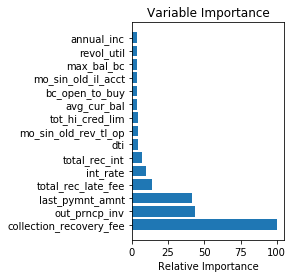

In [42]:
import matplotlib.pyplot as plt

feature_importance = rf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(15) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx][::-1][0:15], align = 'center')
plt.yticks(pos, X.columns[sorted_idx][::-1][0:15])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()